In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import Image
import os

In [ ]:
# !unzip '/content/drive/MyDrive/trashnet-data/dataset-resized.zip' -d '/content/drive/MyDrive'

In [ ]:
!pip install ultralytics


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.7/78.2 GB disk)


In [ ]:
!yolo predict model=yolov8l.pt source='/content/drive/MyDrive/book_image.jpg'


Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

image 1/1 /content/drive/MyDrive/book_image.jpg: 320x640 16 books, 144.2ms
Speed: 2.0ms preprocess, 144.2ms inference, 171.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


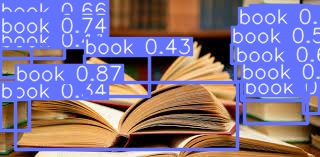

In [ ]:
display(Image('/content/runs/detect/predict2/book_image.jpg'))

In [ ]:
len(os.listdir('/content/drive/MyDrive/dataset-resized/cardboard'))

403

In [ ]:
import os
import random
import shutil

# Define the path to your data directory
data_dir = "/content/drive/MyDrive/dataset-resized"

# Define the categories/classes you want to classify
classes = ["cardboard", "plastic", "metal", "trash", "paper", "glass"]

# Define the train-validation split ratio
split_ratio = 0.8

# Create empty lists to hold the image paths and class labels
image_paths = []
class_labels = []

# Loop over each category/class and add the image paths and class labels to the lists
for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image_paths.append(image_path)
        class_labels.append(class_name)

# Shuffle the data
random.seed(42)
data = list(zip(image_paths, class_labels))
random.shuffle(data)
image_paths, class_labels = zip(*data)

# Calculate the split point
split_point = int(len(image_paths) * split_ratio)

# Split the data into train and validation sets
train_image_paths = image_paths[:split_point]
val_image_paths = image_paths[split_point:]
train_class_labels = class_labels[:split_point]
val_class_labels = class_labels[split_point:]

# Define the paths to the train and validation directories
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# Create the train and validation directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Copy the train images to the train directory
for image_path, class_label in zip(train_image_paths, train_class_labels):
    class_dir = os.path.join(train_dir, class_label)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    image_name = os.path.basename(image_path)
    shutil.copy(image_path, os.path.join(class_dir, image_name))

# Copy the validation images to the validation directory
for image_path, class_label in zip(val_image_paths, val_class_labels):
    class_dir = os.path.join(val_dir, class_label)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    image_name = os.path.basename(image_path)
    shutil.copy(image_path, os.path.join(class_dir, image_name))


In [ ]:
len(os.listdir('/content/drive/MyDrive/dataset-resized/cardboard'))

403

In [ ]:
len(os.listdir('/content/drive/MyDrive/dataset-resized/train/cardboard'))

319

In [ ]:
len(os.listdir('/content/drive/MyDrive/dataset-resized/val/cardboard'))

84

In [ ]:
!rm -rf /content/drive/MyDrive/dataset-resized/train

In [ ]:
!yolo classify train data=/content/drive/MyDrive/dataset-resized model=yolov8l-cls.pt epochs=100

100% 71.7M/71.7M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/content/drive/MyDrive/dataset-resized, epochs=100, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

Checking how our model is performing

Original data without prediction for val batch0

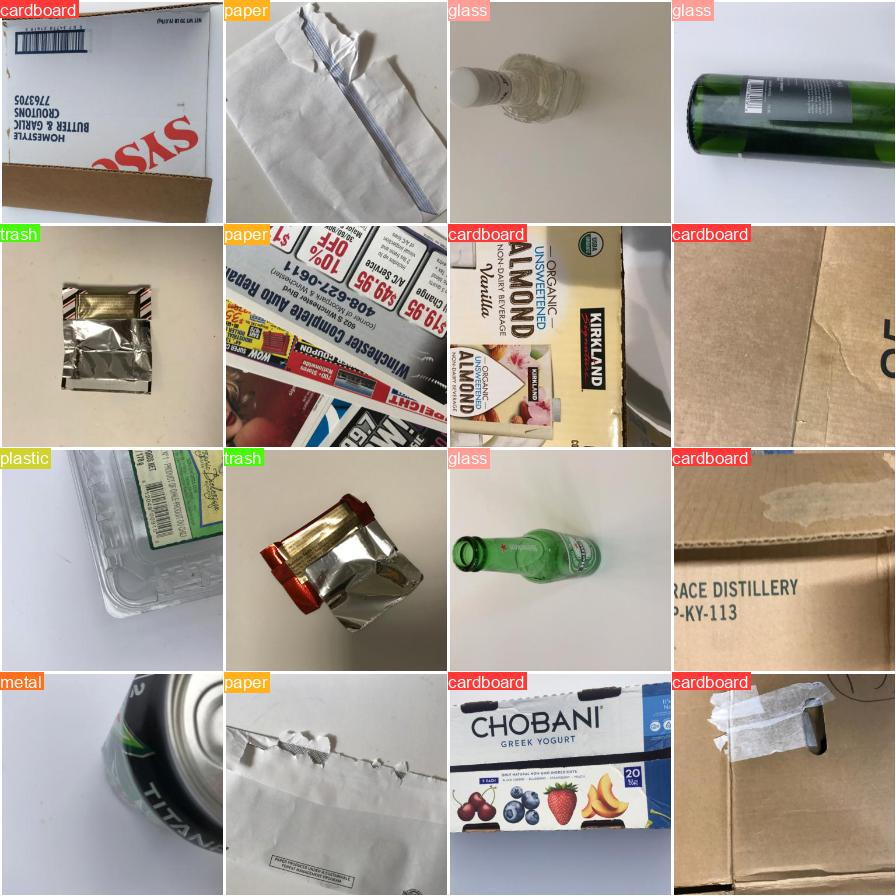

In [ ]:
display(Image('/content/runs/classify/train/val_batch0_labels.jpg', height=600))

Model's performance on val-batch0 after prediction

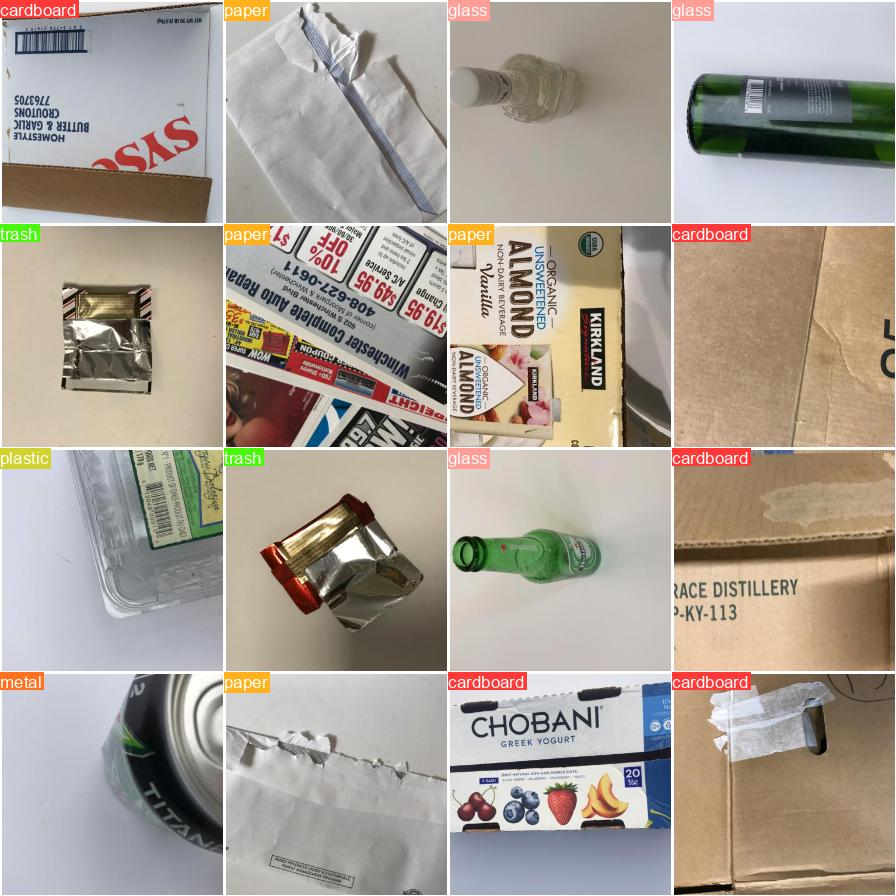

In [ ]:
display(Image('/content/runs/classify/train/val_batch0_pred.jpg', height=600))

## Validation

In [ ]:
!yolo classify val data=/content/drive/MyDrive/dataset-resized model=/content/runs/classify/train/weights/best.pt conf=0.6

Ultralytics YOLOv8.0.93 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36192262 parameters, 0 gradients, 98.7 GFLOPs
               classes   top1_acc   top5_acc: 100% 32/32 [00:04<00:00,  6.90it/s]
                   all      0.875          1
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


## Confusion Matrix

Learn more about Confusion Matrix [here](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

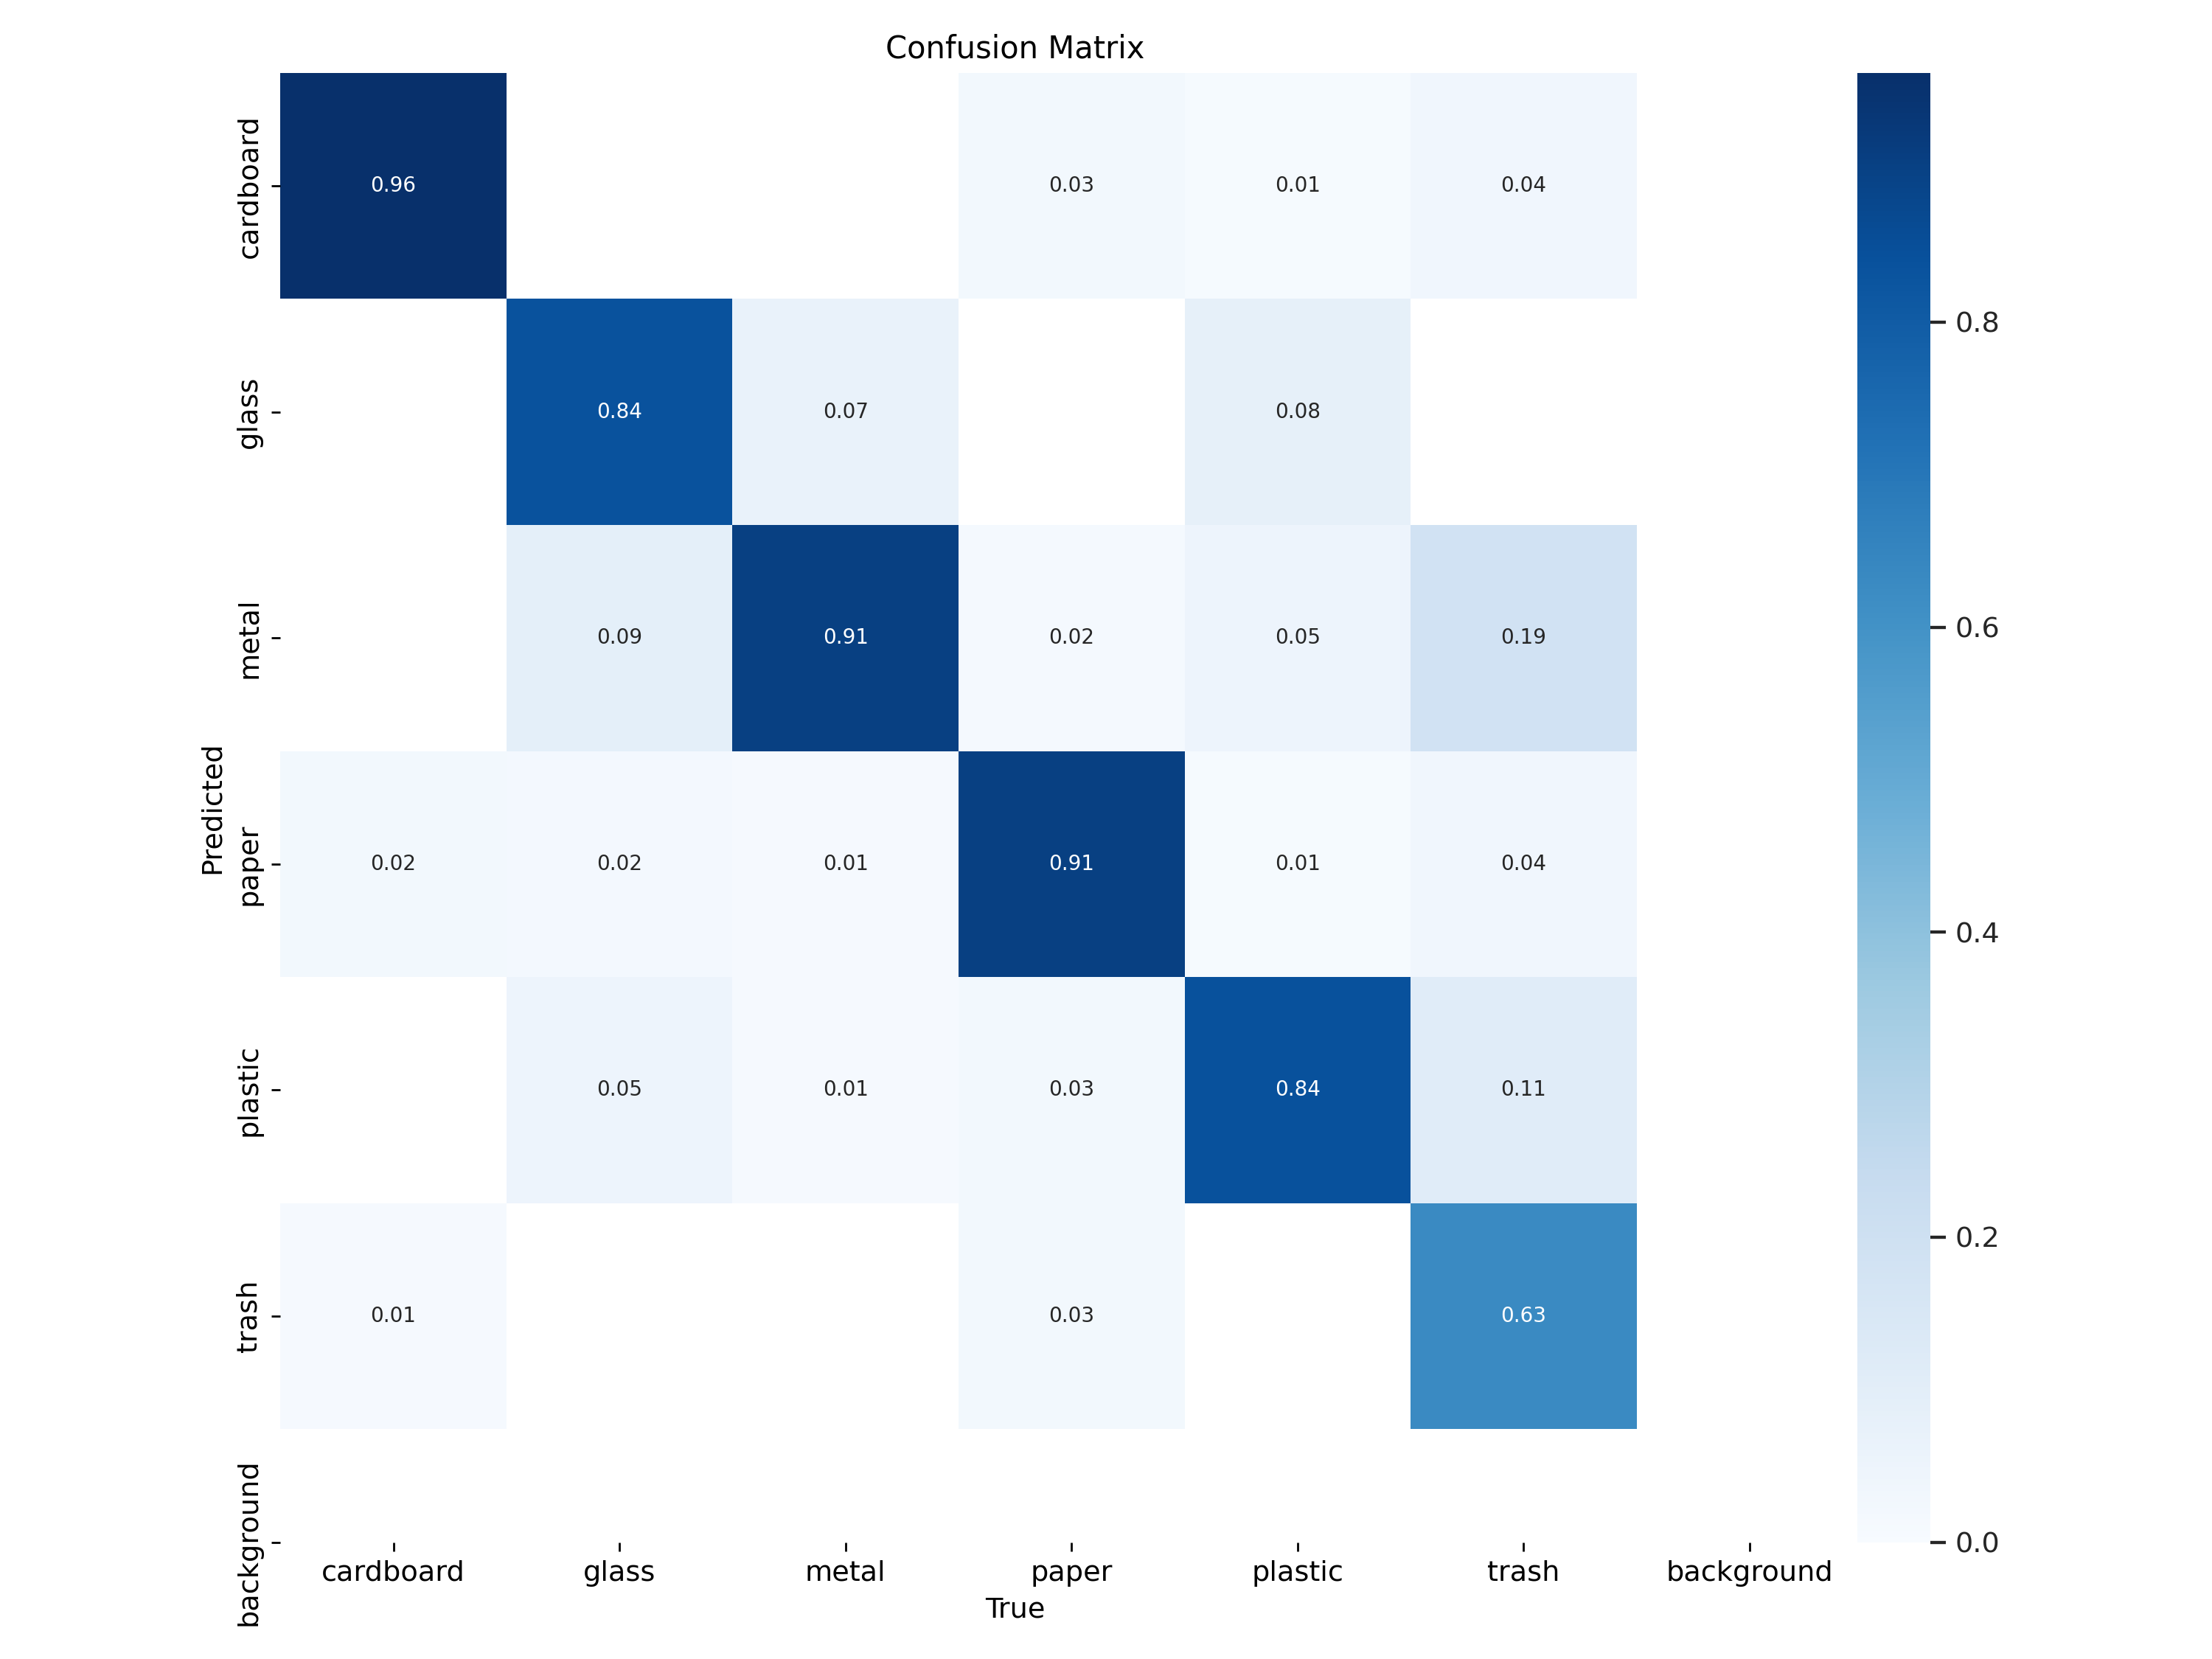

In [ ]:
display(Image('/content/runs/classify/val/confusion_matrix.png', height=500))

## Prediction


Let's get this [picture](https://en.wikipedia.org/wiki/Cardboard_box#/media/File:Box.agr.jpg) from the internet which happens to be a cardboard and let's see <br>whether our model will be able to make prediction

In [ ]:
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.6 agnostic_nms=True iou=0.99 source=/content/drive/MyDrive/waste_source_images/607px-Box.agr.jpg

Ultralytics YOLOv8.0.93 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36192262 parameters, 0 gradients, 98.7 GFLOPs

image 1/1 /content/drive/MyDrive/waste_source_images/607px-Box.agr.jpg: 224x224 cardboard 0.95, paper 0.04, plastic 0.01, metal 0.00, trash 0.00, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict6


## Prediction made by our Model :

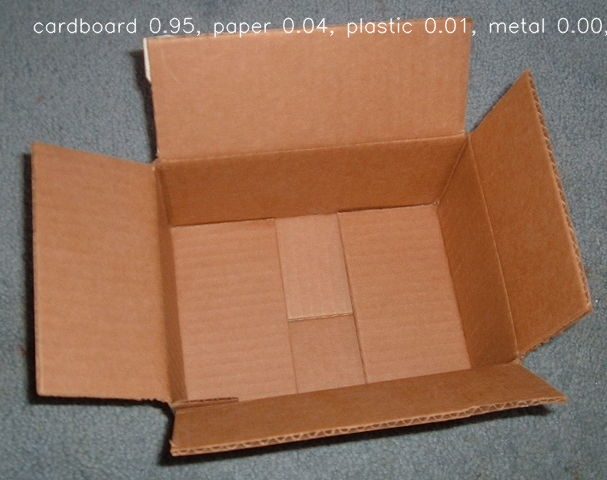

In [ ]:
display(Image('/content/runs/classify/predict6/607px-Box.agr.jpg', height=500))

###  Let's check another prediction

Actual Label which is a Metal

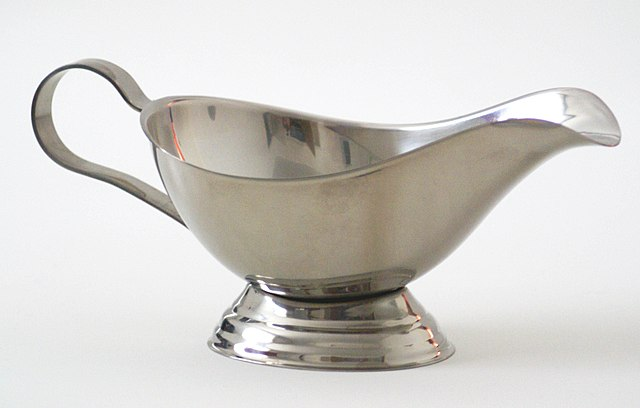

In [ ]:
display(Image('/content/drive/MyDrive/waste_source_images/640px-Sauce.jpg', height=400))

Prediction by our Model:

In [ ]:
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.6 agnostic_nms=True iou=0.99 source=/content/drive/MyDrive/waste_source_images/640px-Sauce.jpg

Ultralytics YOLOv8.0.93 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36192262 parameters, 0 gradients, 98.7 GFLOPs

image 1/1 /content/drive/MyDrive/waste_source_images/640px-Sauce.jpg: 224x224 paper 0.64, cardboard 0.33, glass 0.01, plastic 0.01, metal 0.00, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict7


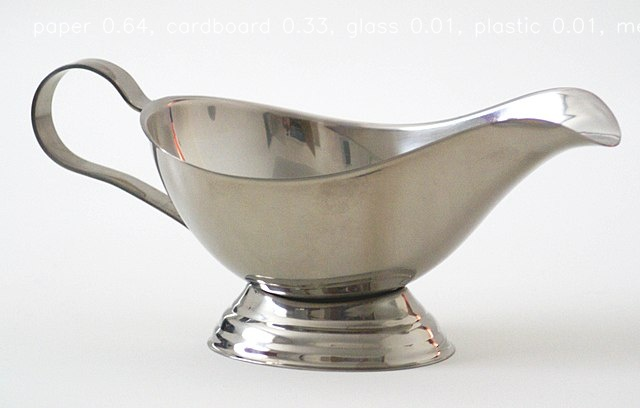

In [ ]:
display(Image('/content/runs/classify/predict7/640px-Sauce.jpg', height=500))

## Our data is still missing out on some predictions
> Let's perform some data augmentation techniques

In [ ]:
!yolo classify train data=/content/drive/MyDrive/dataset-resized model=yolov8l-cls.pt epochs=100 degrees=150 shear=60 flipud=0.6 mixup=0.5 project=adding_hyperparameters

Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/content/drive/MyDrive/dataset-resized, epochs=100, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=adding_hyperparameters, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

Making Inference on the New Model

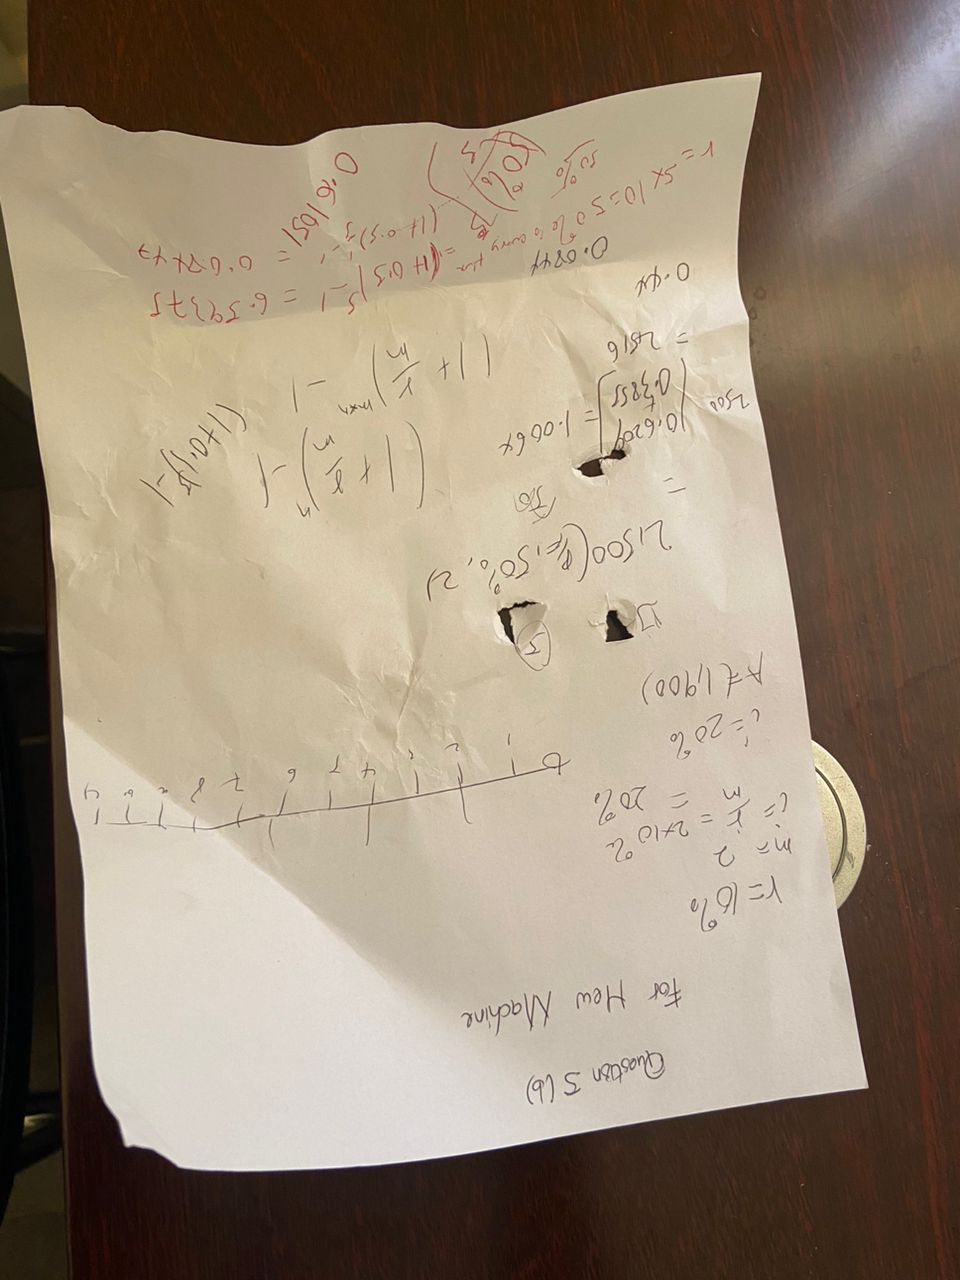

In [ ]:
display(Image('/content/drive/MyDrive/waste_source_images/IMG-20230508-WA0040.jpg'))

In [ ]:
!yolo task=classify mode=predict model=/content/adding_hyperparameters/train/weights/best.pt conf=0.6 agnostic_nms=True iou=0.99 source=/content/drive/MyDrive/waste_source_images/IMG-20230508-WA0040.jpg

Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36192262 parameters, 0 gradients, 98.7 GFLOPs

image 1/1 /content/drive/MyDrive/waste_source_images/IMG-20230508-WA0040.jpg: 224x224 cardboard 0.80, paper 0.20, plastic 0.00, metal 0.00, trash 0.00, 11.1ms
Speed: 1.2ms preprocess, 11.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


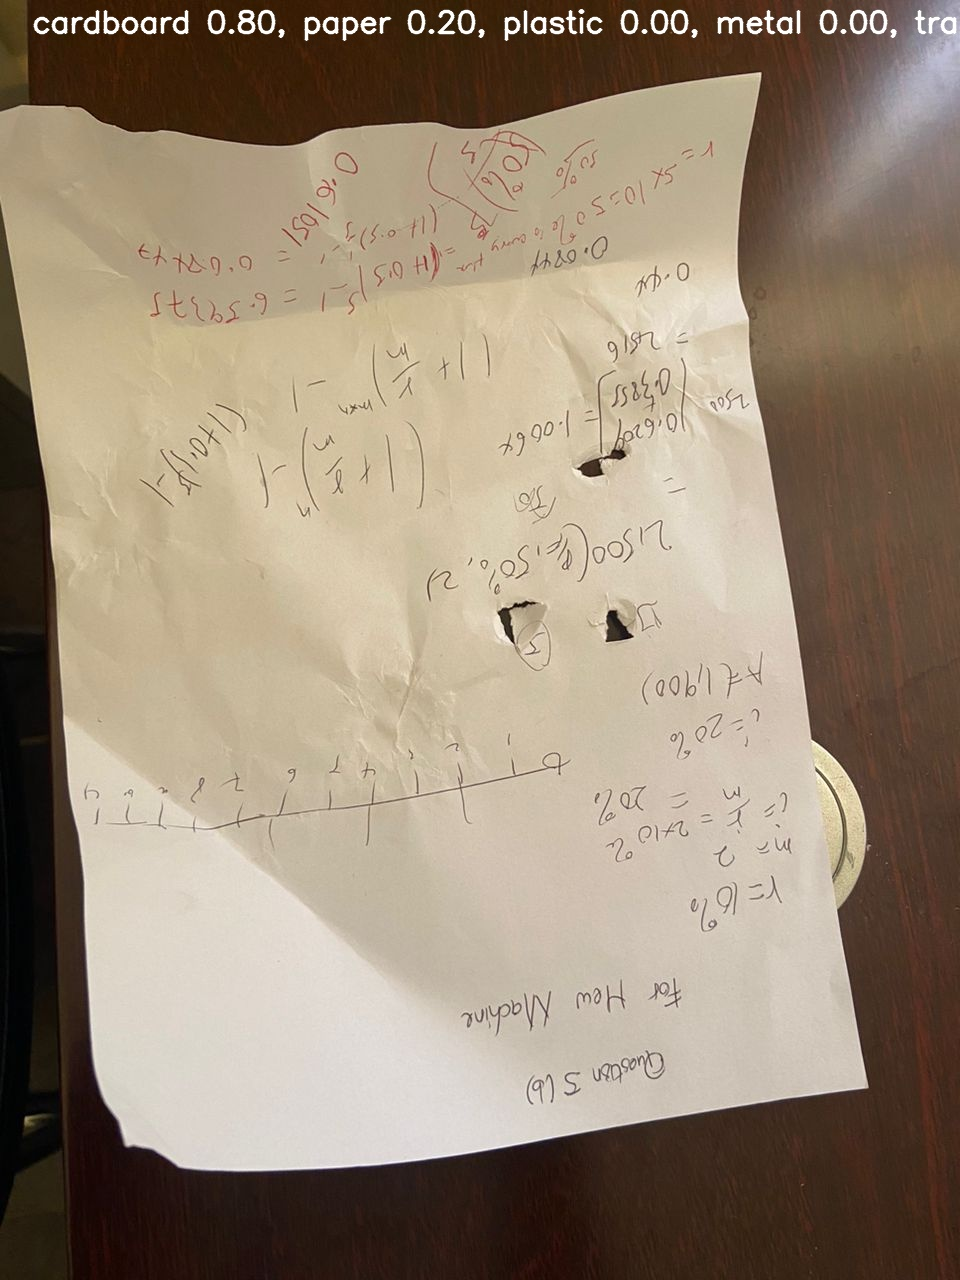

In [ ]:
display(Image('/content/runs/classify/predict/IMG-20230508-WA0040.jpg'))

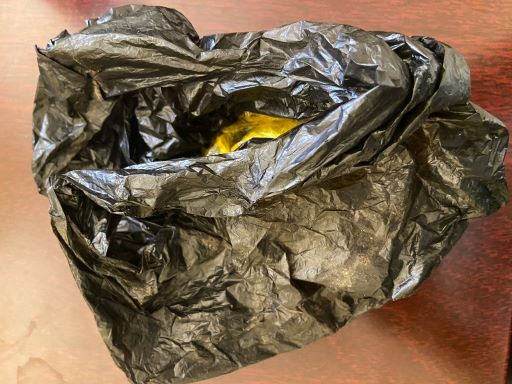

In [ ]:
display(Image('/content/drive/MyDrive/waste_source_images/rubber.jpg'))

In [ ]:
!yolo task=classify mode=predict model=/content/adding_hyperparameters/train/weights/best.pt conf=0.6 agnostic_nms=True iou=0.99 source=/content/drive/MyDrive/waste_source_images/rubber.jpg

Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36192262 parameters, 0 gradients, 98.7 GFLOPs

image 1/1 /content/drive/MyDrive/waste_source_images/rubber.jpg: 224x224 metal 0.99, cardboard 0.01, paper 0.00, trash 0.00, glass 0.00, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 0.3ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict4


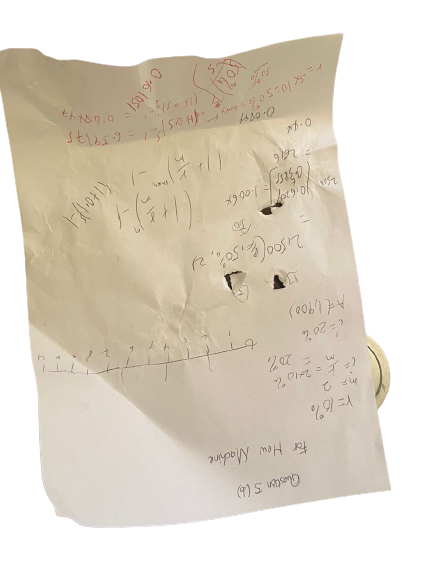

In [ ]:
display(Image('/content/drive/MyDrive/waste_source_images/bg_removed_sheet.png'))

In [ ]:
!yolo task=classify mode=predict model=/content/adding_hyperparameters/train/weights/best.pt conf=0.6 agnostic_nms=True iou=0.99 source=/content/drive/MyDrive/waste_source_images/bg_removed_sheet.png

Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36192262 parameters, 0 gradients, 98.7 GFLOPs

image 1/1 /content/drive/MyDrive/waste_source_images/bg_removed_sheet.png: 224x224 paper 0.68, trash 0.12, cardboard 0.10, plastic 0.10, glass 0.00, 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict7
